In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8abf0bcdb29a1a643c73becac883a0d


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | erenhot
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | agirish
Processing Record 8 of Set 1 | port shepstone
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | half moon bay
Processing Record 18 of Set 1 | itaituba
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | bow

Processing Record 39 of Set 4 | adrar
Processing Record 40 of Set 4 | wangaratta
Processing Record 41 of Set 4 | baillif
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | ossora
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | teknaf
Processing Record 47 of Set 4 | namatanai
Processing Record 48 of Set 4 | zhob
Processing Record 49 of Set 4 | tapejara
Processing Record 50 of Set 4 | la ronge
Processing Record 1 of Set 5 | aflu
City not found. Skipping...
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | beyneu
Processing Record 4 of Set 5 | beloha
Processing Record 5 of Set 5 | olafsvik
Processing Record 6 of Set 5 | revin
Processing Record 7 of Set 5 | champua
Processing Record 8 of Set 5 | voskresenskoye
Processing Record 9 of Set 5 | te anau
Processing Record 10 of Set 5 | kavaratti
Processing Record 11 of Set 5 | nabire
Processing Record 12 of Set 5 | itaquyry
Processing Re

Processing Record 25 of Set 8 | coahuayana
Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | vidim
Processing Record 28 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 29 of Set 8 | clonakilty
Processing Record 30 of Set 8 | sandwick
Processing Record 31 of Set 8 | khakhea
Processing Record 32 of Set 8 | fereydun kenar
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | aksarayskiy
Processing Record 35 of Set 8 | cabedelo
Processing Record 36 of Set 8 | yurimaguas
Processing Record 37 of Set 8 | ayagoz
Processing Record 38 of Set 8 | teya
Processing Record 39 of Set 8 | kushmurun
Processing Record 40 of Set 8 | ulaangom
Processing Record 41 of Set 8 | eldikan
City not found. Skipping...
Processing Record 42 of Set 8 | akyab
Processing Record 43 of Set 8 | we
City not found. Skipping...
Processing Record 44 of Set 8 | san andres
Processing Record 45 of Set 8 | murgab
Processing Record 46 of Set 8 | rajbiraj
Process

Processing Record 12 of Set 12 | nguiu
City not found. Skipping...
Processing Record 13 of Set 12 | taybad
Processing Record 14 of Set 12 | nerchinskiy zavod
Processing Record 15 of Set 12 | morehead
Processing Record 16 of Set 12 | vaovai
City not found. Skipping...
Processing Record 17 of Set 12 | morant bay
Processing Record 18 of Set 12 | locri
Processing Record 19 of Set 12 | hope
Processing Record 20 of Set 12 | meiktila
Processing Record 21 of Set 12 | stony plain
Processing Record 22 of Set 12 | kutoarjo
Processing Record 23 of Set 12 | san patricio
Processing Record 24 of Set 12 | altay
Processing Record 25 of Set 12 | cairns
Processing Record 26 of Set 12 | gao
Processing Record 27 of Set 12 | lavrentiya
Processing Record 28 of Set 12 | ouadda
Processing Record 29 of Set 12 | lunenburg
Processing Record 30 of Set 12 | upington
Processing Record 31 of Set 12 | faya
Processing Record 32 of Set 12 | ugoofaaru
Processing Record 33 of Set 12 | shitanjing
Processing Record 34 of Se

In [12]:
len(city_data)

560

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Erenhot,43.6475,111.9767,42.33,72,100,16.44,CN,2022-05-10 00:34:41
1,Margate,51.3813,1.3862,61.88,64,100,4.00,GB,2022-05-10 00:34:42
2,Butaritari,3.0707,172.7902,81.57,74,12,19.39,KI,2022-05-10 00:34:42
3,Rikitea,-23.1203,-134.9692,76.69,70,41,11.03,PF,2022-05-10 00:32:31
4,Ushuaia,-54.8000,-68.3000,42.46,75,40,17.27,AR,2022-05-10 00:34:43
5,Husavik,66.0449,-17.3389,36.68,98,100,12.59,IS,2022-05-10 00:34:44
6,Agirish,61.9247,63.0231,47.10,63,15,4.25,RU,2022-05-10 00:34:44
7,Port Shepstone,-30.7414,30.4550,62.62,79,0,4.54,ZA,2022-05-10 00:34:45
8,Dikson,73.5069,80.5464,15.57,89,16,15.77,RU,2022-05-10 00:34:45
9,Saint-Philippe,-21.3585,55.7679,69.39,75,0,6.02,RE,2022-05-10 00:34:46


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Erenhot,CN,2022-05-10 00:34:41,43.6475,111.9767,42.33,72,100,16.44
1,Margate,GB,2022-05-10 00:34:42,51.3813,1.3862,61.88,64,100,4.00
2,Butaritari,KI,2022-05-10 00:34:42,3.0707,172.7902,81.57,74,12,19.39
3,Rikitea,PF,2022-05-10 00:32:31,-23.1203,-134.9692,76.69,70,41,11.03
4,Ushuaia,AR,2022-05-10 00:34:43,-54.8000,-68.3000,42.46,75,40,17.27
5,Husavik,IS,2022-05-10 00:34:44,66.0449,-17.3389,36.68,98,100,12.59
6,Agirish,RU,2022-05-10 00:34:44,61.9247,63.0231,47.10,63,15,4.25
7,Port Shepstone,ZA,2022-05-10 00:34:45,-30.7414,30.4550,62.62,79,0,4.54
8,Dikson,RU,2022-05-10 00:34:45,73.5069,80.5464,15.57,89,16,15.77
9,Saint-Philippe,RE,2022-05-10 00:34:46,-21.3585,55.7679,69.39,75,0,6.02


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1652145959.124079

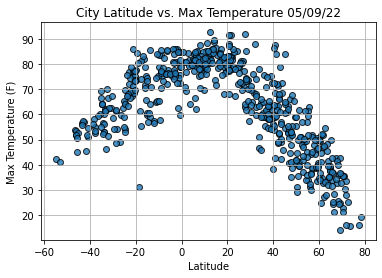

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

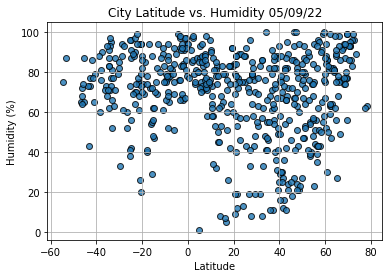

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

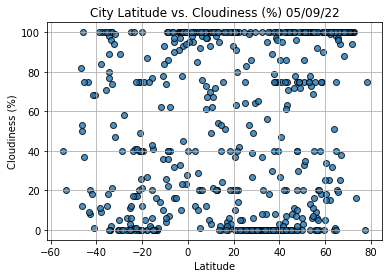

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

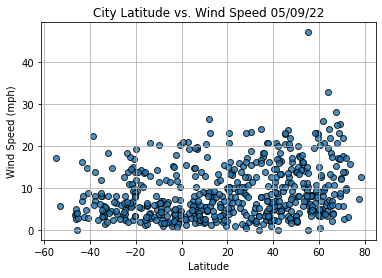

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Erenhot,CN,2022-05-10 00:34:41,43.6475,111.9767,42.33,72,100,16.44
1,Margate,GB,2022-05-10 00:34:42,51.3813,1.3862,61.88,64,100,4.00
2,Butaritari,KI,2022-05-10 00:34:42,3.0707,172.7902,81.57,74,12,19.39
5,Husavik,IS,2022-05-10 00:34:44,66.0449,-17.3389,36.68,98,100,12.59
6,Agirish,RU,2022-05-10 00:34:44,61.9247,63.0231,47.10,63,15,4.25
...,...,...,...,...,...,...,...,...,...
553,Malkapur,IN,2022-05-10 00:56:27,20.8833,76.2000,87.10,40,91,10.27
555,Camargo,MX,2022-05-10 00:56:28,27.6667,-105.1667,91.78,8,86,12.68
556,Atar,MR,2022-05-10 00:56:29,20.5169,-13.0499,91.67,19,100,9.17
557,Nalut,LY,2022-05-10 00:56:30,30.3333,10.8500,63.59,55,0,15.39


In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Erenhot,CN,2022-05-10 00:34:41,43.6475,111.9767,42.33,72,100,16.44
1,Margate,GB,2022-05-10 00:34:42,51.3813,1.3862,61.88,64,100,4.00
2,Butaritari,KI,2022-05-10 00:34:42,3.0707,172.7902,81.57,74,12,19.39
5,Husavik,IS,2022-05-10 00:34:44,66.0449,-17.3389,36.68,98,100,12.59
6,Agirish,RU,2022-05-10 00:34:44,61.9247,63.0231,47.10,63,15,4.25


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

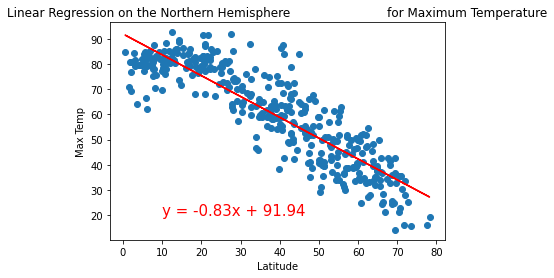

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

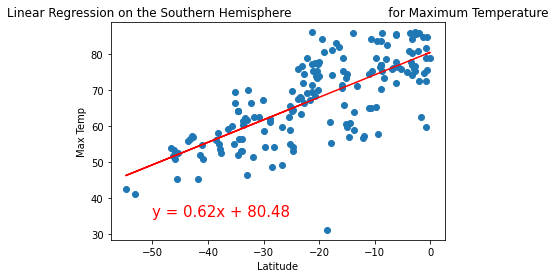

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,35))

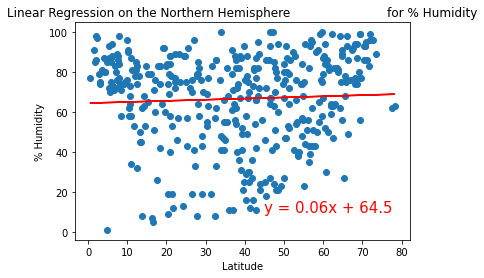

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

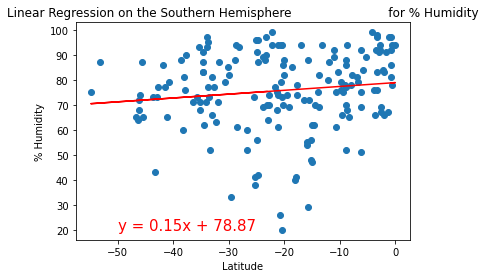

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

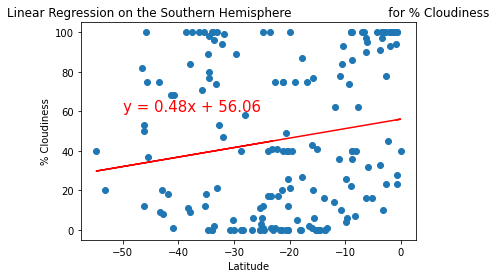

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

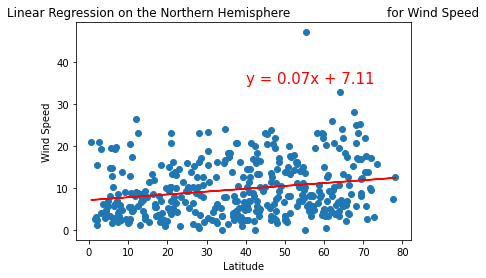

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

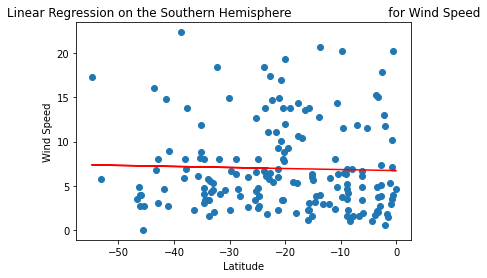

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))